**Data Preparation - BMI Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('bmi.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


### **General Information & Missing Value**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


Observation :
1. I used very simple data to make my self easy to Learn about Phyton
2. The colomns has no missing values
3. All dtypes seem OK (appriopriate)
4. We can use df.isna().sum() to identify the null data from the dataset, but the result will be same

In [6]:
df.isna().sum() #there are no missing values or you can use data.isna().sum()*100/len(df)

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

### Data Manipulation & Data Understanding
#### Statisitcal summary

In [ ]:
# Observation: Because all of the data is numericals we can easily use function df.describe()

In [7]:
df.describe() 

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [8]:
# Adding new Features to easy classify the Health Status
def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
df['Status'] = df.apply(convert_status_to_description,axis=1)
df.head()

,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


Noted: if you can look further about the data, we can conclude that each column has normal distribution

In [9]:
def bmi_operation(Weight, Height):
  return Weight / (Height/100)**2

In [10]:
df['BMI'] = df.apply(lambda x: bmi_operation(x['Weight'],x['Height']), axis = 1)
df

,Gender,Height,Weight,Index,Status,BMI
0,Male,174,96,4,Obesity,31.708284
1,Male,189,87,2,Normal,24.355421
2,Female,185,110,4,Obesity,32.140248
3,Female,195,104,3,Overweight,27.350427
4,Male,149,61,3,Overweight,27.476240
...,...,...,...,...,...,...
495,Female,150,153,5,Extreme Obesity,68.000000
496,Female,184,121,4,Obesity,35.739603
497,Female,141,136,5,Extreme Obesity,68.407022
498,Male,150,95,5,Extreme Obesity,42.222222


In [11]:
df['BMI'] = np.round(df['BMI'])
df

,Gender,Height,Weight,Index,Status,BMI
0,Male,174,96,4,Obesity,32.0
1,Male,189,87,2,Normal,24.0
2,Female,185,110,4,Obesity,32.0
3,Female,195,104,3,Overweight,27.0
4,Male,149,61,3,Overweight,27.0
...,...,...,...,...,...,...
495,Female,150,153,5,Extreme Obesity,68.0
496,Female,184,121,4,Obesity,36.0
497,Female,141,136,5,Extreme Obesity,68.0
498,Male,150,95,5,Extreme Obesity,42.0


In [12]:
# Melakukan re order dari suatu Kolumn
df_reorder = df[['Gender','Height','Weight','BMI','Index','Status']]
df_reorder

,Gender,Height,Weight,BMI,Index,Status
0,Male,174,96,32.0,4,Obesity
1,Male,189,87,24.0,2,Normal
2,Female,185,110,32.0,4,Obesity
3,Female,195,104,27.0,3,Overweight
4,Male,149,61,27.0,3,Overweight
...,...,...,...,...,...,...
495,Female,150,153,68.0,5,Extreme Obesity
496,Female,184,121,36.0,4,Obesity
497,Female,141,136,68.0,5,Extreme Obesity
498,Male,150,95,42.0,5,Extreme Obesity


**Try to Univariate Analysis**

In [13]:
numericals = ['Height','Weight','BMI','Index']
categoricals = ['Status']

In [14]:
features = numericals

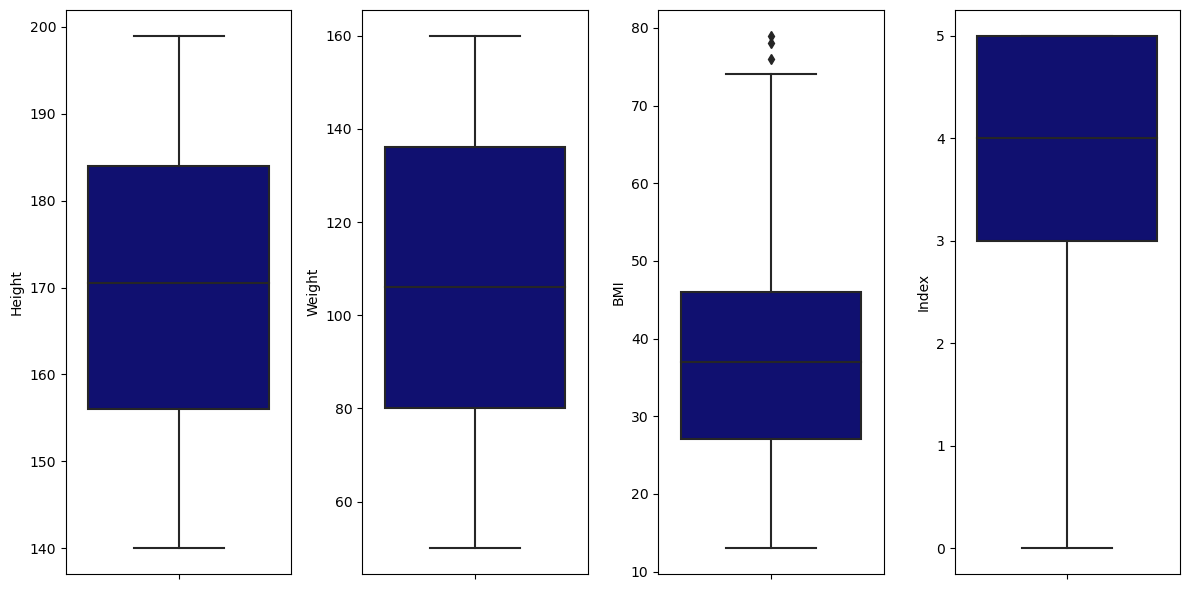

In [15]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='navy')
    plt.tight_layout()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

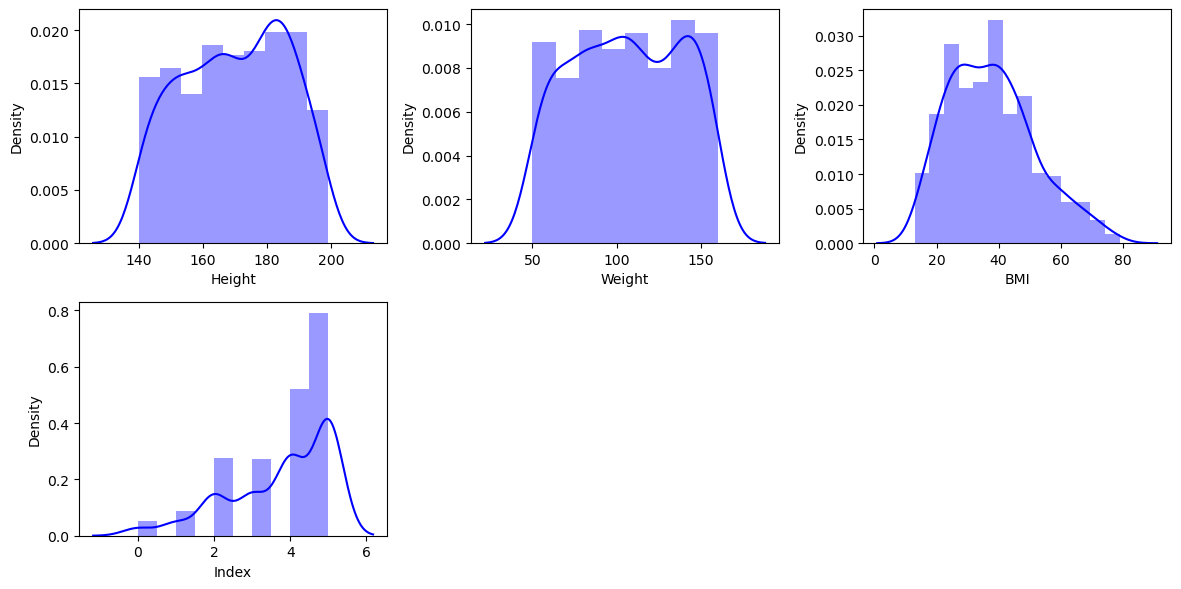

In [16]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

## Bivariate Analysis

In [17]:
df_reorder.head()

,Gender,Height,Weight,BMI,Index,Status
0,Male,174,96,32.0,4,Obesity
1,Male,189,87,24.0,2,Normal
2,Female,185,110,32.0,4,Obesity
3,Female,195,104,27.0,3,Overweight
4,Male,149,61,27.0,3,Overweight


<AxesSubplot:xlabel='Status', ylabel='count'>

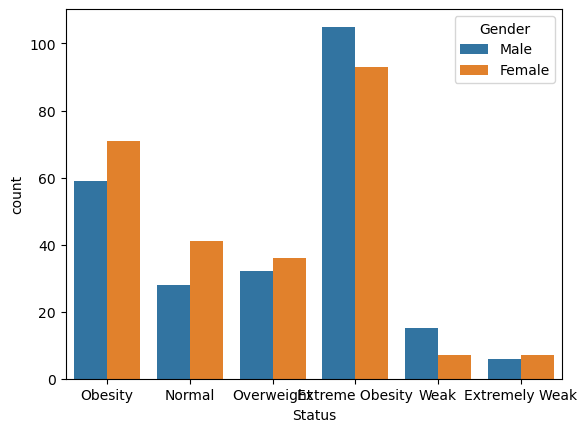

In [18]:
sns.countplot(data=df_reorder,
            hue='Gender',
            x='Status')

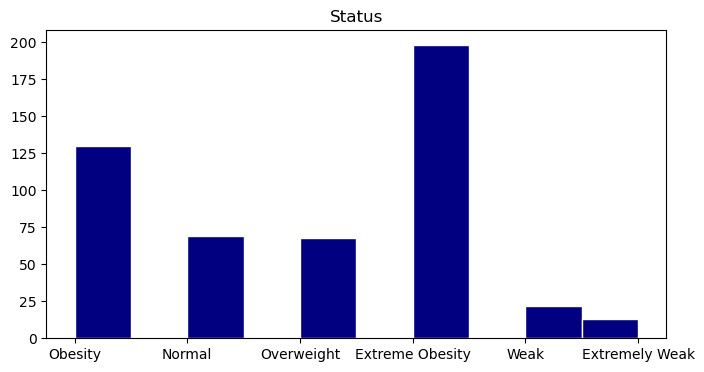

In [19]:
Index = df.Status.hist(figsize=(8,4), color="Navy", ec="white", grid=False).set_title('Status')

<AxesSubplot:>

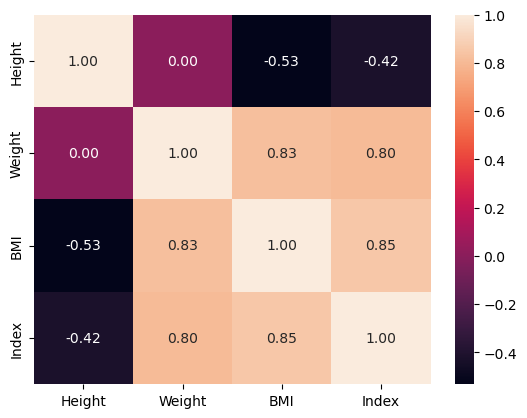

In [20]:
correlation = df_reorder.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

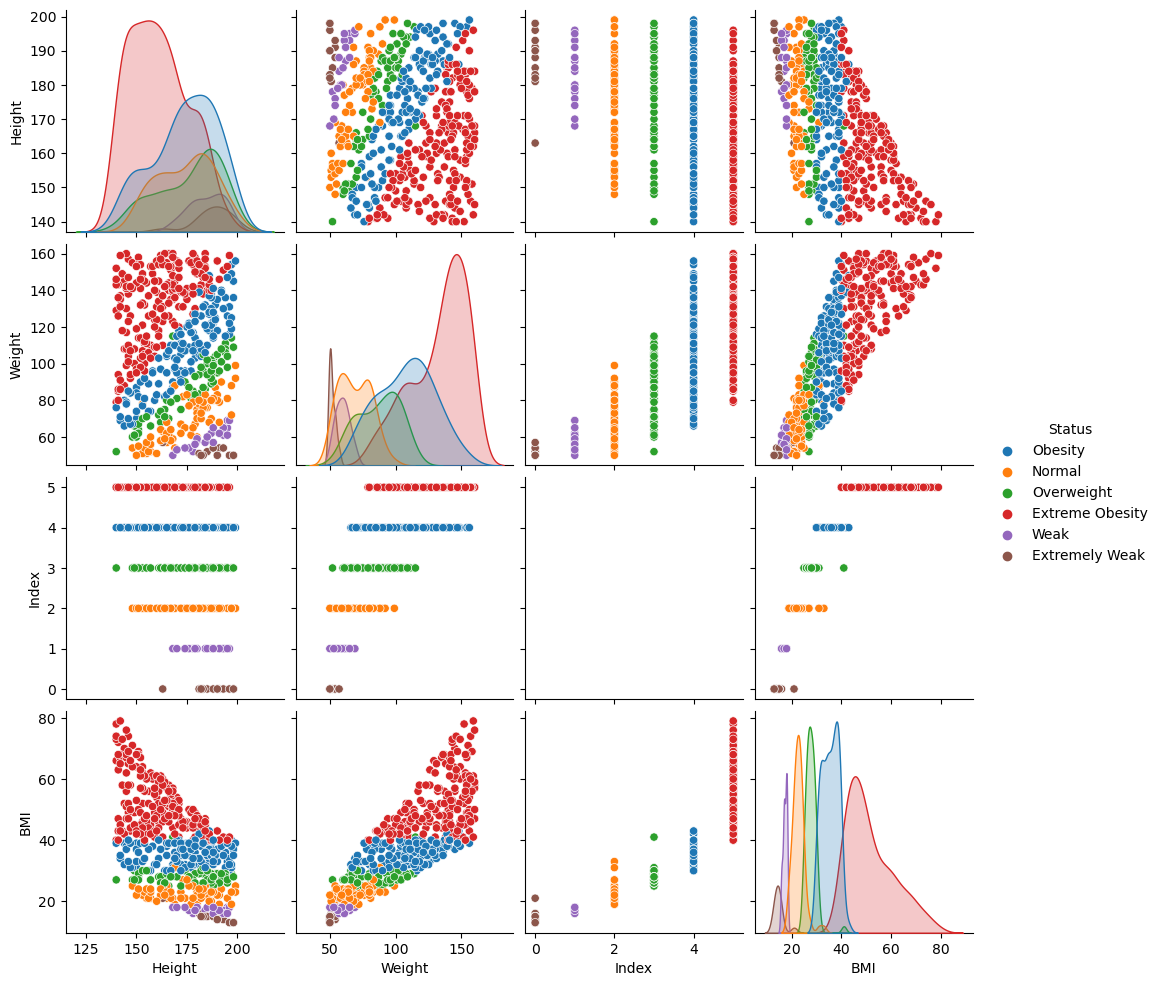

In [21]:
sns.pairplot(df, hue='Status')

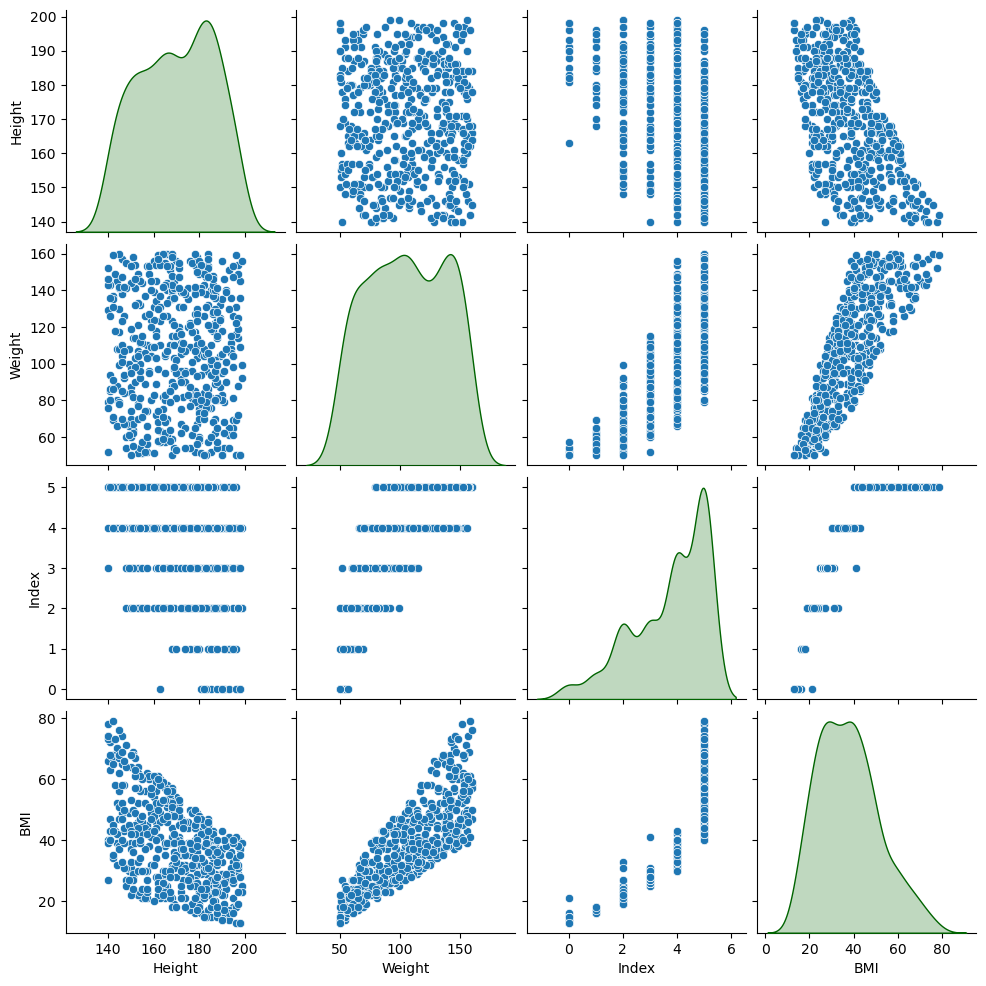

In [49]:
sns.pairplot(df, diag_kind='kde',
             diag_kws={'color':'darkgreen'})

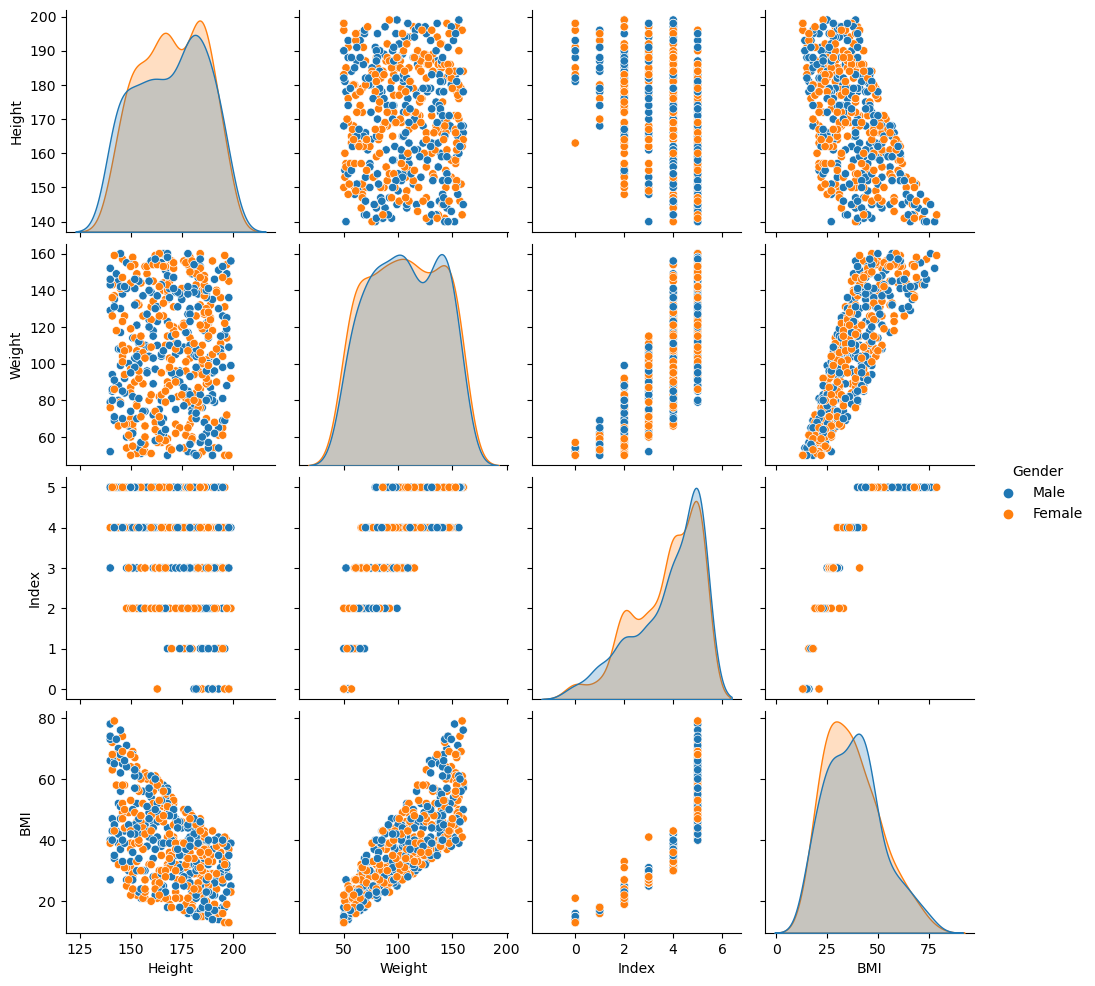

In [37]:
sns.pairplot(df, hue='Gender')

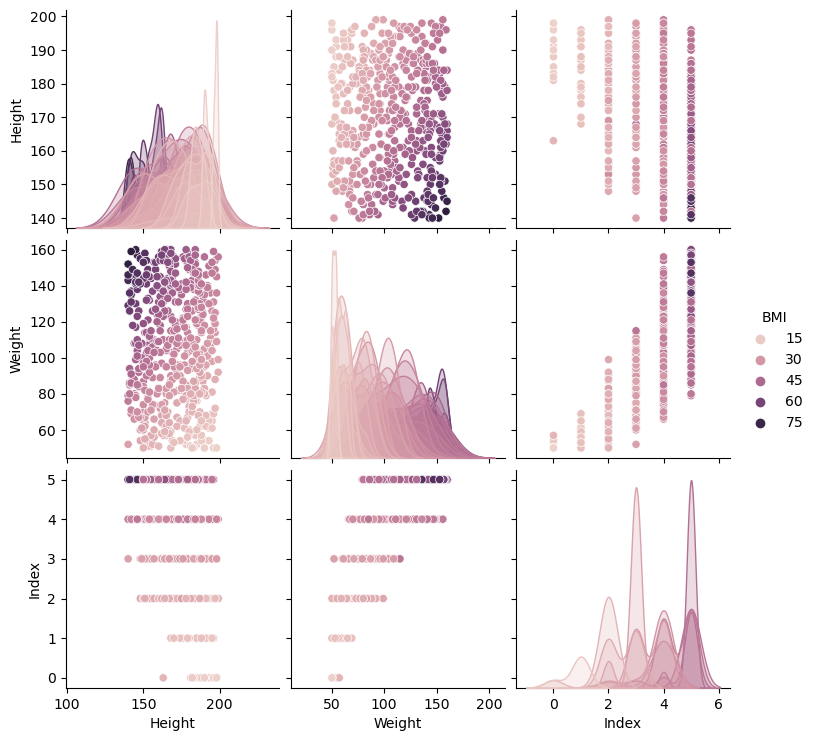

In [50]:
sns.pairplot(df, hue='BMI')

# Exploratory Data Analysis Questions
1. 5 Top Weight in Male and Female (Extreme Obesity and Weak)
2. Male and Female based on Health Status

**Top Weight in Male and Female (Extreme Obesity)**

In [79]:
Extreme_Obesity = df[(df['Status']=='Extreme Obesity')].sort_values('BMI',ascending=False)
Extreme_Weak = df[(df['Status']=='Extremely Weak')].sort_values('BMI',ascending=False)

In [81]:
Extreme_Obesity 

,Gender,Height,Weight,Index,Status,BMI
247,Female,142,159,5,Extreme Obesity,79.0
49,Male,140,152,5,Extreme Obesity,78.0
204,Male,145,160,5,Extreme Obesity,76.0
111,Female,146,157,5,Extreme Obesity,74.0
147,Female,140,146,5,Extreme Obesity,74.0
...,...,...,...,...,...,...
300,Female,186,140,5,Extreme Obesity,40.0
72,Male,141,80,5,Extreme Obesity,40.0
473,Male,195,153,5,Extreme Obesity,40.0
144,Male,140,79,5,Extreme Obesity,40.0


In [82]:
Extreme_Weak

,Gender,Height,Weight,Index,Status,BMI
273,Female,163,57,0,Extremely Weak,21.0
79,Male,181,51,0,Extremely Weak,16.0
60,Female,191,54,0,Extremely Weak,15.0
214,Female,185,52,0,Extremely Weak,15.0
224,Male,188,54,0,Extremely Weak,15.0
244,Female,183,50,0,Extremely Weak,15.0
453,Male,182,50,0,Extremely Weak,15.0
62,Male,193,54,0,Extremely Weak,14.0
99,Female,190,50,0,Extremely Weak,14.0
354,Male,190,50,0,Extremely Weak,14.0


<AxesSubplot:xlabel='Status', ylabel='count'>

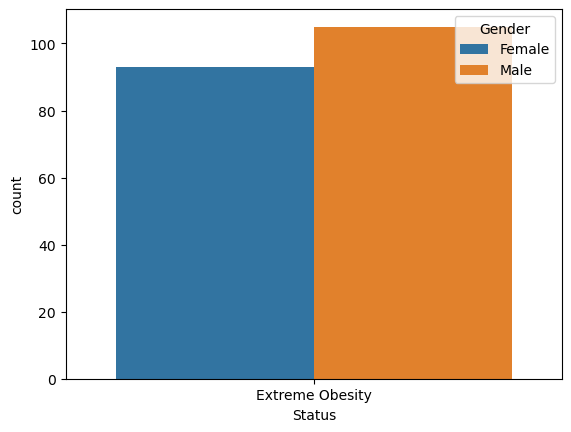

In [83]:
sns.countplot(data=Extreme_Obesity,
            hue='Gender',
            x='Status')

<AxesSubplot:xlabel='Status', ylabel='count'>

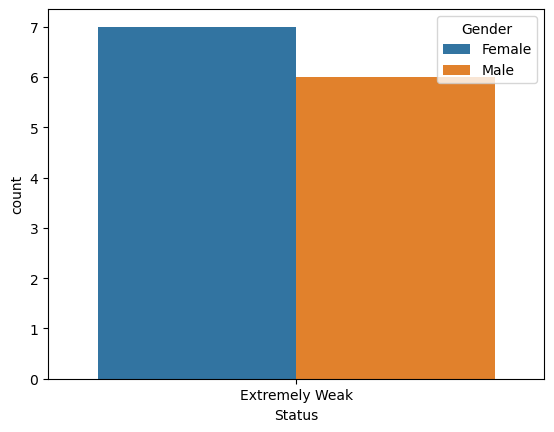

In [85]:
sns.countplot(data=Extreme_Weak,
            hue='Gender',
            x='Status')

In [71]:
Extreme_Obesity_Female = df[(df['Status']=='Extreme Obesity')&(df['Gender']=='Female')]
Extreme_Obesity_Female.sort_values('BMI',ascending=False).head(5)

,Gender,Height,Weight,Index,Status,BMI
247,Female,142,159,5,Extreme Obesity,79.0
111,Female,146,157,5,Extreme Obesity,74.0
147,Female,140,146,5,Extreme Obesity,74.0
61,Female,141,143,5,Extreme Obesity,72.0
491,Female,146,147,5,Extreme Obesity,69.0


In [73]:
Extreme_Obesity_Male = df[(df['Status']=='Extreme Obesity')&(df['Gender']=='Male')]
Extreme_Obesity_Male.sort_values('BMI',ascending=False).head(5)

,Gender,Height,Weight,Index,Status,BMI
49,Male,140,152,5,Extreme Obesity,78.0
204,Male,145,160,5,Extreme Obesity,76.0
421,Male,140,146,5,Extreme Obesity,74.0
442,Male,143,149,5,Extreme Obesity,73.0
251,Male,140,143,5,Extreme Obesity,73.0


In [75]:
Extreme_Weak_Female = df[(df['Status']=='Extremely Weak')&(df['Gender']=='Female')]
Extreme_Weak_Female.sort_values('BMI',ascending=True).head(5)

,Gender,Height,Weight,Index,Status,BMI
150,Female,196,50,0,Extremely Weak,13.0
492,Female,198,50,0,Extremely Weak,13.0
99,Female,190,50,0,Extremely Weak,14.0
60,Female,191,54,0,Extremely Weak,15.0
214,Female,185,52,0,Extremely Weak,15.0


In [76]:
Extreme_Weak_Male = df[(df['Status']=='Extremely Weak')&(df['Gender']=='Male')]
Extreme_Weak_Male.sort_values('BMI',ascending=True).head(5)

,Gender,Height,Weight,Index,Status,BMI
85,Male,198,50,0,Extremely Weak,13.0
62,Male,193,54,0,Extremely Weak,14.0
354,Male,190,50,0,Extremely Weak,14.0
224,Male,188,54,0,Extremely Weak,15.0
453,Male,182,50,0,Extremely Weak,15.0


## Exploratory Data Analysis (Conclusion)

- The prevalence of obesity in females and Males is high, but obesity is more prevalent among women than men. But men rather have extreme obesity than women
- The majority of the sample has an “extreme obesity” BMI status, followed by “obesity”, and the same level on normal and overweight BMI status
- Height has negative correlation with BMI status
- Weight has positive strong correlation wiht BMI status

### Data Visualization Using Cute Chart

In [22]:
!pip install cutecharts

In [24]:
import cutecharts.charts as ctc #for using cutechart to visualize the data

In [86]:
Status = df['Status'].value_counts().to_frame(name='count')
Status

,count
Extreme Obesity,198
Obesity,130
Normal,69
Overweight,68
Weak,22
Extremely Weak,13


In [87]:
pie = ctc.Pie('Health Status', # title
              width='650px',height='720px')
pie.set_options(labels=list(Status.index), 
                inner_radius=0,
               )
pie.add_series(list(Status['count'])) 
pie.render_notebook()